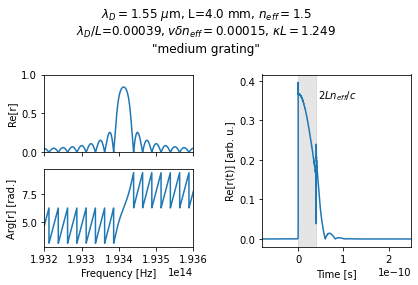

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

c = 2.9979e8
lambda_D = 1.55e-6
freq_D = c/lambda_D
v = 1
delta_neff = 1.5e-4
neff = 1.5
L = 4e-3

freq = np.linspace(c/1.8e-6, c/1.3e-6, 600000)

delta = 2*np.pi*neff*(freq - freq_D)/c
kappa = np.pi*v*delta_neff*freq/c

S = np.zeros(len(freq), dtype=complex)

for i in range(0, len(freq)):
    S[i] = cmath.sqrt(kappa[i]**2-delta[i]**2)

r = -kappa*np.sinh(S*L)/(delta*np.sinh(S*L)+1j*S*np.cosh(S*L))

time = np.fft.fftshift(np.fft.fftfreq(n=len(freq), d=freq[1]-freq[0]))
r_t = np.fft.fftshift(np.fft.fft(r))/np.sqrt(len(freq))

ax1 = plt.subplot(2, 2, 1)
plt.plot(freq, np.abs(r))
plt.xlim(1.932e14, 1.936e14)
plt.ylim(0, 1)
ax1.set_xticklabels('')
ax1.set_ylabel('Re[r]')
ax2 = plt.subplot(2, 2, 3)
plt.plot(freq, np.unwrap(np.angle(r))+3*np.pi/2)
plt.xlim(1.932e14, 1.936e14)
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Arg[r] [rad.]')

tau = 2*L*neff/c

ax3 = plt.subplot(1, 2, 2)
plt.plot(time, np.abs(r_t))
ax3.axvspan(0, tau, alpha=0.2, color='grey')
plt.xlim(-0.8e-10, 2.5e-10)
ax3.set_ylabel('Re[r(t)] [arb. u.]')
ax3.text(tau*1.1, 0.9*np.max(np.abs(r_t)), r'$2Ln_{eff}/c$')
ax3.set_xlabel('Time [s]')

if 5*v*delta_neff < lambda_D/L:
    tit_str = '\"weak grating\"", BW inversely porportional length'
elif v*delta_neff > 5*lambda_D/L:
    tit_str = '\"strong grating\", BW length independent'
else:
    tit_str = '\"medium grating\"'

plt.suptitle(r'$\lambda_D=$'+str(lambda_D*1e6)+' $\mu$m, L='+str(L*1e3)+' mm, $n_{eff}=1.5$\n'+
            '$\lambda_D/L$='+"{:.5f}".format(lambda_D/L)+'$, v\delta n_{eff}=$'+str(v*delta_neff)+
            ', $\kappa{L}=$'+"{:.3f}".format(L*kappa[int(len(freq)/2)])+'\n'+
            tit_str)

plt.tight_layout()